In [6]:
import sys
import os
from tqdm import tqdm
sys.path.append("../") # go to parent dir

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import false_discovery_control

from my_src.utils import load_optimal_parameters_df
from my_src.clinical_group import ClinicalGroup 
from my_src.statistics import compute_max_t_stat, permutation_testing
from my_src import constants


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Amyloid Beta Impact

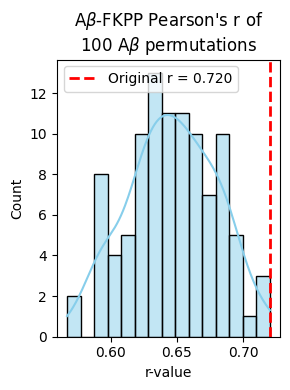

Permutation-based p-value (one-sided): 0.0099


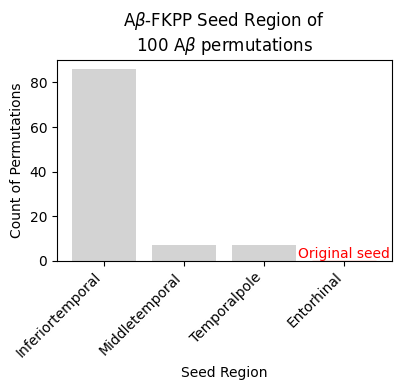

Original model used seed_region=Entorhinal with alpha=0.419, r=0.720


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Example: Prepare your DataFrame ---
# Assuming your DataFrame is named `df` with columns:
# ["clinical_group_name","participant","seed_region","alpha","r","SSE","model_name"]
model_names = ["WFKPP","WFKPP_PERMUTE_AB"]
optimal_parameters = load_optimal_parameters_df(model_names)

# 1) Separate the original model row (the "true" or "unpermuted" model).
orig_row = optimal_parameters[
    ((optimal_parameters["model_name"] == "WFKPP") \
        & (optimal_parameters["clinical_group_name"] == "CN") \
            & (optimal_parameters["participant"] == "avg"))]

# There should be exactly one row for the original model:
orig_r = orig_row['r'].values[0]
orig_seed = orig_row['seed_region'].values[0]
orig_alpha = orig_row['alpha'].values[0]

# 2) Extract only the permuted AB rows:
perm_rows = optimal_parameters[optimal_parameters["model_name"] == "WFKPP_PERMUTE_AB"]


# ---------------------------------------------------------------------
# PLOT 1: Distribution of r-values for permutations, marking the original
# ---------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(3,4))

sns.histplot(perm_rows['r'], bins=15, kde=True, color="skyblue", edgecolor="black", ax=ax)
ax.axvline(x=orig_r, color='red', linestyle='--', linewidth=2,
           label=f'Original r = {orig_r:.3f}')
ax.set_title(r"A$\beta$-FKPP Pearson's r of"+"\n" + r"100 A$\beta$ permutations")
ax.set_xlabel("r-value")
ax.set_ylabel("Count")
ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(constants.figures_folder, "wfkpp_permuted_ab_r_distribution.pdf"))
plt.show()

# ---------------------------------------------------------------------
# Permutation-style p-value test (one-sided)
# ---------------------------------------------------------------------
perm_vals = perm_rows['r'].values
# Count how many permuted r's are >= the actual r (if higher r = better).
n_greater_equal = np.sum(perm_vals >= orig_r)
# Typical permutation p-value (with a small plus-1 correction):
p_value = (n_greater_equal + 1) / (len(perm_vals) + 1)
print(f"Permutation-based p-value (one-sided): {p_value:.4f}")

# ---------------------------------------------------------------------
# PLOT 2: Bar plot of seed_region frequencies among permutations
#         Mark or highlight the original seed region
# ---------------------------------------------------------------------
seed_counts = perm_rows['seed_region'].value_counts()
if orig_seed not in seed_counts.index:
    seed_counts.loc[orig_seed] = 0
ordered_seeds = [s for s in seed_counts.index if s != orig_seed]
ordered_seeds.append(orig_seed)
seed_counts = seed_counts.reindex(ordered_seeds)


fig, ax = plt.subplots(figsize=(4.125,4))
bars = ax.bar(seed_counts.index, seed_counts.values, color="lightgray")

# If you want to color the bar for the original seed region or add an arrow:
for i, bar in enumerate(bars):
    region = seed_counts.index[i]
    if region == orig_seed:
        bar.set_color("salmon")  # highlight bar
        # optionally annotate
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                "Original seed", ha='center', va='bottom', color='red')

ax.set_title(r"A$\beta$-FKPP Seed Region of" + "\n" + r"100 A$\beta$ permutations")
ax.set_xlabel("Seed Region")
ax.set_ylabel("Count of Permutations")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(constants.figures_folder, "wfkpp_permuted_ab_seed_region.pdf"))
plt.show()

print(f"Original model used seed_region={orig_seed} with alpha={orig_alpha:.3f}, r={orig_r:.3f}")


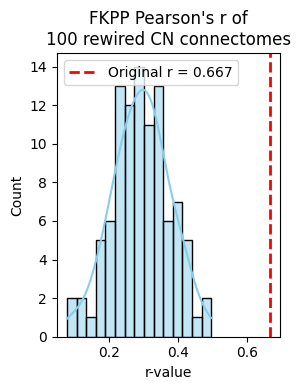

Permutation-based p-value (one-sided): 0.0099


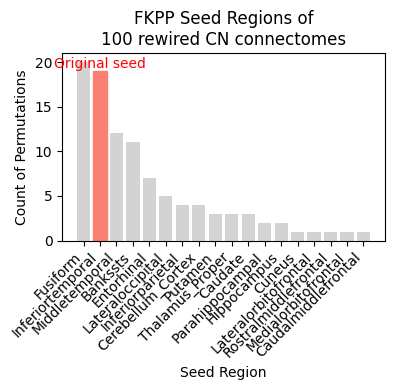

Original model used seed_region=Inferiortemporal with alpha=0.463, r=0.667


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Example: Prepare your DataFrame ---
# Assuming your DataFrame is named `df` with columns:
# ["clinical_group_name","participant","seed_region","alpha","r","SSE","model_name"]
model_names = ["FKPP","FKPP_REWIRED"]
optimal_parameters = load_optimal_parameters_df(model_names)

# 1) Separate the original model row (the "true" or "unpermuted" model).
orig_row = optimal_parameters[
    ((optimal_parameters["model_name"] == "FKPP") \
        & (optimal_parameters["clinical_group_name"] == "CN") \
            & (optimal_parameters["participant"] == "avg"))]

# There should be exactly one row for the original model:
orig_r = orig_row['r'].values[0]
orig_seed = orig_row['seed_region'].values[0]
orig_alpha = orig_row['alpha'].values[0]

# 2) Extract only the permuted AB rows:
perm_rows = optimal_parameters[optimal_parameters["model_name"] == "FKPP_REWIRED"]


# ---------------------------------------------------------------------
# PLOT 1: Distribution of r-values for permutations, marking the original
# ---------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(3,4))

sns.histplot(perm_rows['r'], bins=15, kde=True, color="skyblue", edgecolor="black", ax=ax)
ax.axvline(x=orig_r, color='red', linestyle='--', linewidth=2,
           label=f'Original r = {orig_r:.3f}')
ax.set_title("FKPP Pearson's r of\n100 rewired CN connectomes")
ax.set_xlabel("r-value")
ax.set_ylabel("Count")
ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(constants.figures_folder, "fkpp_rewired_r_distribution.pdf"))
plt.show()

# ---------------------------------------------------------------------
# Permutation-style p-value test (one-sided)
# ---------------------------------------------------------------------
perm_vals = perm_rows['r'].values
# Count how many permuted r's are >= the actual r (if higher r = better).
n_greater_equal = np.sum(perm_vals >= orig_r)
# Typical permutation p-value (with a small plus-1 correction):
p_value = (n_greater_equal + 1) / (len(perm_vals) + 1)
print(f"Permutation-based p-value (one-sided): {p_value:.4f}")

# ---------------------------------------------------------------------
# PLOT 2: Bar plot of seed_region frequencies among permutations
#         Mark or highlight the original seed region
# ---------------------------------------------------------------------
seed_counts = perm_rows['seed_region'].value_counts()

fig, ax = plt.subplots(figsize=(4.125,4))
bars = ax.bar(seed_counts.index, seed_counts.values, color="lightgray")

# If you want to color the bar for the original seed region or add an arrow:
for i, bar in enumerate(bars):
    region = seed_counts.index[i]
    if region == orig_seed:
        bar.set_color("salmon")  # highlight bar
        # optionally annotate
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                "Original seed", ha='center', va='bottom', color='red')

ax.set_title("FKPP Seed Regions of\n100 rewired CN connectomes")
ax.set_xlabel("Seed Region")
ax.set_ylabel("Count of Permutations")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(constants.figures_folder, "fkpp_rewired_seed_region.pdf"))
plt.show()

print(f"Original model used seed_region={orig_seed} with alpha={orig_alpha:.3f}, r={orig_r:.3f}")


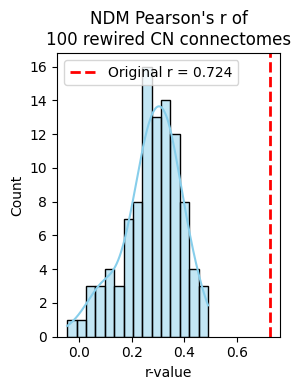

Permutation-based p-value (one-sided): 0.0099


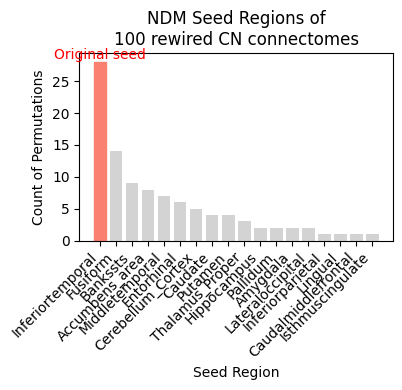

Original model used seed_region=Inferiortemporal, r=0.724


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Example: Prepare your DataFrame ---
# Assuming your DataFrame is named `df` with columns:
# ["clinical_group_name","participant","seed_region","alpha","r","SSE","model_name"]
model_names = ["NDM","NDM_REWIRED"]
optimal_parameters = load_optimal_parameters_df(model_names)

# 1) Separate the original model row (the "true" or "unpermuted" model).
orig_row = optimal_parameters[
    ((optimal_parameters["model_name"] == "NDM") \
        & (optimal_parameters["clinical_group_name"] == "CN") \
            & (optimal_parameters["participant"] == "avg"))]

# There should be exactly one row for the original model:
orig_r = orig_row['r'].values[0]
orig_seed = orig_row['seed_region'].values[0]
orig_alpha = orig_row['alpha'].values[0]

# 2) Extract only the permuted AB rows:
perm_rows = optimal_parameters[optimal_parameters["model_name"] == "NDM_REWIRED"]


# ---------------------------------------------------------------------
# PLOT 1: Distribution of r-values for permutations, marking the original
# ---------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(3,4))

sns.histplot(perm_rows['r'], bins=15, kde=True, color="skyblue", edgecolor="black", ax=ax)
ax.axvline(x=orig_r, color='red', linestyle='--', linewidth=2,
           label=f'Original r = {orig_r:.3f}')
ax.set_title("NDM Pearson's r of\n100 rewired CN connectomes")
ax.set_xlabel("r-value")
ax.set_ylabel("Count")
ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(constants.figures_folder, "ndm_rewired_r_distribution.pdf"))
plt.show()

# ---------------------------------------------------------------------
# Permutation-style p-value test (one-sided)
# ---------------------------------------------------------------------
perm_vals = perm_rows['r'].values
# Count how many permuted r's are >= the actual r (if higher r = better).
n_greater_equal = np.sum(perm_vals >= orig_r)
# Typical permutation p-value (with a small plus-1 correction):
p_value = (n_greater_equal + 1) / (len(perm_vals) + 1)
print(f"Permutation-based p-value (one-sided): {p_value:.4f}")

# ---------------------------------------------------------------------
# PLOT 2: Bar plot of seed_region frequencies among permutations
#         Mark or highlight the original seed region
# ---------------------------------------------------------------------
seed_counts = perm_rows['seed_region'].value_counts()

fig, ax = plt.subplots(figsize=(4.125,4))
bars = ax.bar(seed_counts.index, seed_counts.values, color="lightgray")

# If you want to color the bar for the original seed region or add an arrow:
for i, bar in enumerate(bars):
    region = seed_counts.index[i]
    if region == orig_seed:
        bar.set_color("salmon")  # highlight bar
        # optionally annotate
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                "Original seed", ha='center', va='bottom', color='red')

ax.set_title("NDM Seed Regions of\n100 rewired CN connectomes")
ax.set_xlabel("Seed Region")
ax.set_ylabel("Count of Permutations")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(constants.figures_folder, "ndm_rewired_seed_region.pdf"))
plt.show()

print(f"Original model used seed_region={orig_seed}, r={orig_r:.3f}")


In [48]:


# Base path for the files
base_path = "/Users/melinajingtinglaimon/Documents/UCL-ML-Coursework/COMP0118 CW3/results/optimization_iters/FKPP_REWIRED/"

# Create an empty list to store results
results = []

# Loop through all permutations
for perm_idx in tqdm(range(1, 101), desc="Processing permutation files"):
    # Construct filepath with zero-padded permutation number
    filepath = os.path.join(base_path, f"FKPP_REWIRED_CN_avg_perm{perm_idx:03d}.csv")
    
    try:
        # Read the CSV file
        df = pd.read_csv(filepath)
        
        # Find the row with the minimum function value
        min_idx = df['func_vals'].idxmin()
        min_row = df.loc[min_idx]
        
        # Extract the node and alpha values
        results.append({
            'permutation': perm_idx,
            'optimal_node': min_row['node'],
            'optimal_alpha': min_row['alpha'],
            'min_func_val': min_row['func_vals']
        })
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")

# Convert results to a dataframe
results_df = pd.DataFrame(results)

# Display summary statistics
print("\nSummary of optimal nodes:")
print(results_df['optimal_node'].value_counts().head(10))

print("\nSummary statistics for alpha values:")
print(results_df['optimal_alpha'].describe())

# Save the results
output_path = "/Users/melinajingtinglaimon/Documents/UCL-ML-Coursework/COMP0118 CW3/results/fkpp_rewired_optimal_params.csv"
results_df.to_csv(output_path, index=False)
print(f"\nResults saved to {output_path}")

# Optionally, compare with the original (non-rewired) connectome result
# If you have it available in a similar format
# ```

# Additional analyses you might want to add:

# Count frequency of each seed region being optimal
seed_counts = results_df['optimal_node'].value_counts()

# Create histogram of alpha values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(results_df['optimal_node'], bins=20, alpha=0.7)
plt.xlabel('Optimal alpha value')
plt.ylabel('Frequency')
plt.title('Distribution of optimal alpha values across rewired connectomes')
plt.savefig('/Users/melinajingtinglaimon/Documents/UCL-ML-Coursework/COMP0118 CW3/figures/rewired_alpha_distribution.pdf')

Processing permutation files:   0%|          | 0/100 [00:00<?, ?it/s]

Processing permutation files: 100%|██████████| 100/100 [00:00<00:00, 1308.97it/s]


Summary of optimal nodes:
optimal_node
Fusiform             20
Inferiortemporal     19
Middletemporal       12
Bankssts             11
Entorhinal            7
Lateraloccipital      5
Inferiorparietal      4
Cerebellum_Cortex     4
Putamen               3
Caudate               3
Name: count, dtype: int64

Summary statistics for alpha values:
count    100.000000
mean       0.465956
std        0.097198
min        0.243351
25%        0.415226
50%        0.455652
75%        0.509226
max        0.881849
Name: optimal_alpha, dtype: float64

Results saved to /Users/melinajingtinglaimon/Documents/UCL-ML-Coursework/COMP0118 CW3/results/fkpp_rewired_optimal_params.csv


TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1000x600 with 0 Axes>